In [36]:
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigsh,eigs
import matplotlib.pyplot as plt
import torch


In [37]:
def potential(x,k,l,scale=100):
    poten=-1/x*scale
    return poten-k*(l+1)*l/x**2

###### 氢原子能级
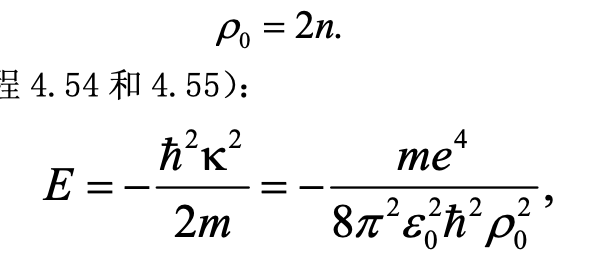
##### 相当于$\alpha=e^2/(4\pi \epsilon_0)=1,E_n=-2m/\hbar^2*\alpha^2/(4n^2)$
##### and $ a_{bohr}=2*k/\alpha, k=\hbar^2/2m $

In [38]:
#需要适当减小,x_M=sqrt(h_bar/(m*w)*(2n+1)),考虑要>10x_M,700sqrt(h_bar/\omega*m)
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)

# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float64
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

La=0
Lb =2
L=Lb-La  # domain length
N = 5000   # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1]
# 角量子数
l=0
# 控制势函数的大小
scale=100

# Construct the tridiagonal matrix A
diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap
V_diag=potential(grid,b_lap,l,scale)

A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag)

# overall,generate matrix

In [39]:
# Solve the eigenvalue problem A phi = lambda phi
eigenvalues= torch.linalg.eigvalsh(A)
print(eigenvalues.shape)
print(eigenvalues[:10])

torch.Size([5000])
tensor([-4998.0022, -1249.8750,  -555.5309,  -312.4922,  -199.9968,  -138.8873,
         -102.0400,   -78.1233,   -61.5724,   -47.6078], device='cuda:0',
       dtype=torch.float64)


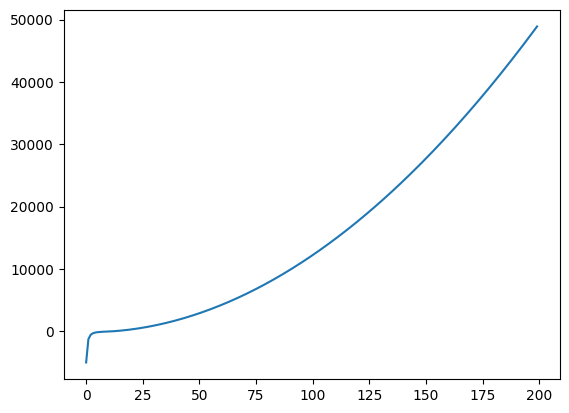

In [40]:
plt.plot(eigenvalues[:200].detach().cpu().numpy(),label="numerical")
plt.show()